In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing as skpp
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

/Users/harry.durbin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
X_train = df_train.drop(['id','species'],axis=1)
X_test = df_test.drop(['id'],axis=1)
y_train = df_train[['species']]

In [6]:
scaler = skpp.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
le = skpp.LabelEncoder()
le.fit(y_train)
classes = le.classes_
y_train_enc = le.transform(y_train) 
y_train = y_train_enc


/Users/harry.durbin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harry.durbin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
classes

array(['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus',
       'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum',
       'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata',
       'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana',
       'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis',
       'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa',
       'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis',
       'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria',
       'Crataegus_Monogyna', 'Cytisus_Battandieri',
       'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta',
       'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba',
       'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua',
       'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus',
       'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia',
       'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_

In [65]:
# classes used to order the label_binarize call below, 
# and at the bottom to give column names to submission data
# classes = df_train.species.unique()
# classes.sort()

# y_train = skpp.label_binarize(y_train_enc, classes = classes)
# y_train[0,]

In [66]:
# pca = PCA().fit(Xtrain.values)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

In [67]:
# pca = PCA(n_components=192)
# pca.fit(X_train)
# X_train = pca.transform(X_train)

# pca_test = PCA(n_components=192)
# pca.fit(X_test)
# X_test = pca.transform(X_test)

In [12]:
kf = KFold(len(df_train), n_folds=10,shuffle=True)
                               
for train_index, test_index in kf:
    Xtrain, Xtest = X_train[train_index], X_train[test_index] # .ix if not pca
    ytrain, ytest = y_train[train_index], y_train[test_index]

In [13]:
from keras.utils.np_utils import to_categorical

y_train_bin = to_categorical(y_train)
ytrain_bin = to_categorical(ytrain)
ytest_bin = to_categorical(ytest)

Using TensorFlow backend.


In [14]:
print Xtrain.shape , ytrain_bin.shape

(891, 192) (891, 99)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(512, input_dim=192))
model.add(Dropout(0.1))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Activation("relu"))

model.add(Dense(output_dim=99))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

hist = model.fit(X_train, y_train_bin, nb_epoch=20, batch_size=10, validation_split=0.1,verbose = 1)

loss_and_metrics = model.evaluate(Xtest, ytest_bin, batch_size=10)



Train on 891 samples, validate on 99 samples
Epoch 1/20
891/891 [==============================] - 2s - loss: 4.5594 - acc: 0.0258 - val_loss: 4.5058 - val_acc: 0.0404
Epoch 2/20
891/891 [==============================] - 1s - loss: 4.3086 - acc: 0.0819 - val_loss: 4.1850 - val_acc: 0.0808
Epoch 3/20
891/891 [==============================] - 1s - loss: 3.7394 - acc: 0.1740 - val_loss: 3.4341 - val_acc: 0.0909
Epoch 4/20
891/891 [==============================] - 1s - loss: 2.8192 - acc: 0.2929 - val_loss: 2.5656 - val_acc: 0.3939
Epoch 5/20
891/891 [==============================] - 1s - loss: 1.9798 - acc: 0.4871 - val_loss: 1.4539 - val_acc: 0.6364
Epoch 6/20
891/891 [==============================] - 1s - loss: 1.2541 - acc: 0.6745 - val_loss: 1.0715 - val_acc: 0.6869
Epoch 7/20
891/891 [==============================] - 1s - loss: 0.9137 - acc: 0.7508 - val_loss: 0.7173 - val_acc: 0.8182
Epoch 8/20
891/891 [==============================] - 1s - loss: 0.6867 - acc: 0.8171 - val_lo

In [1]:
classes = model.predict_classes(Xtest, batch_size=10)
# prob_matrix = model.predict_proba(X_test, batch_size=10)

NameError: name 'model' is not defined

In [80]:
loss_and_metrics

[3.1147194910886218, 0.34343434343434343]

In [81]:
hist.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [86]:
x = np.arange(100,len(y1))

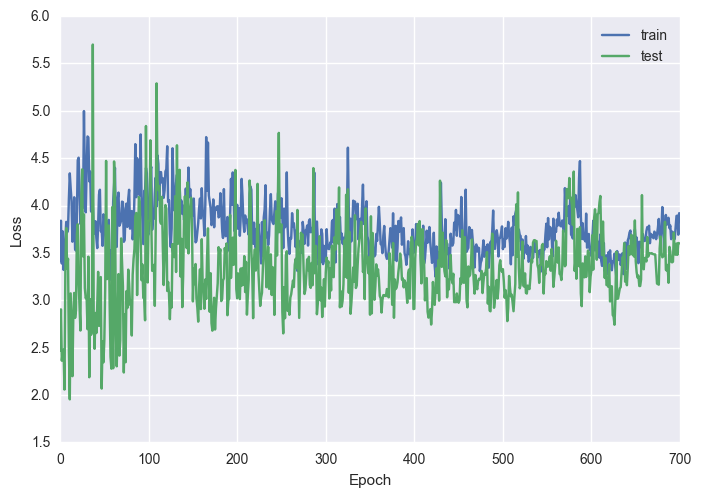

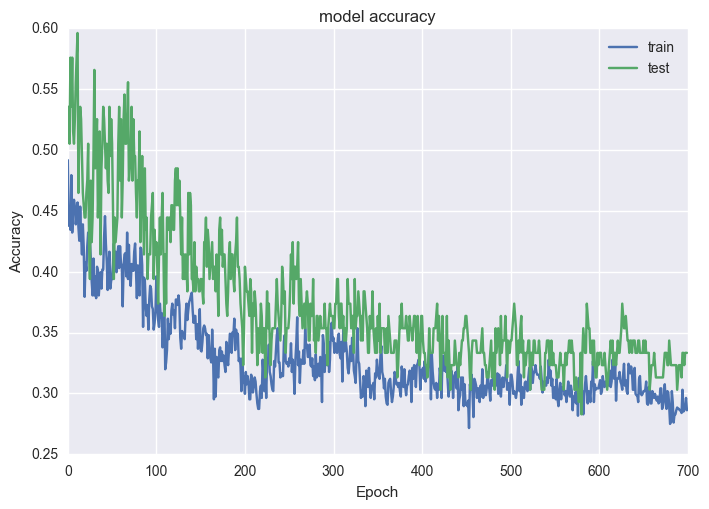

In [90]:
plt.figure(1)
y1 = hist.history['loss'][100:]
y2 = hist.history['val_loss'][100:]
plt.plot(y1)
plt.plot(y2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

plt.plot(hist.history['acc'][100:])
plt.plot(hist.history['val_acc'][100:])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [19]:
classes_keras

array([51, 50,  1, 19, 14,  3,  3, 28, 84,  8, 43, 74, 75, 10, 52, 46, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18, 17,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29,  7, 31, 98, 92, 84, 25, 10, 61, 43, 85, 24,  1,
        2, 23, 83, 40, 22, 48, 90, 25, 21, 37, 56, 41, 95,  7, 89, 98, 77,
        3, 12, 31, 84, 53, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 90, 60, 17, 75, 27, 51, 31, 39, 23, 24,  2, 41, 61, 24, 97,
       29, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 56, 38, 43, 75, 20, 60, 46, 79, 22, 79, 98, 87, 65, 97,
       75, 21, 29, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 93, 89, 72, 36, 11, 81, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 90, 44, 89, 92, 13,  2, 59,  0, 96, 70, 32, 29, 78, 91,
       55, 44, 38,  5, 60

In [92]:
ytest

array([49, 18, 18, 37, 33, 59, 56, 57, 54,  4, 35, 60,  1, 23, 57, 28, 75,
       87,  3, 71, 61, 31, 40, 86, 14, 13,  8, 93, 21, 36, 44, 77, 70, 83,
       53, 43, 40, 26, 86, 93,  8,  7, 14, 40, 28, 60, 95, 50,  9, 32, 55,
       28, 69, 52, 62, 68, 94, 79, 98,  2, 79, 15, 65, 71, 68, 14, 72, 38,
       19, 65, 31, 79, 74,  7,  7, 93, 66, 75, 50, 94, 66, 26, 70, 27, 52,
       17, 72, 10, 73, 64,  8, 76, 59, 45, 82, 70,  0, 75,  5])

In [13]:
svm_clf = OneVsRestClassifier(SVC(kernel='linear', C=0.4, probability=True))
svm_clf = svm_clf.fit(Xtrain, ytrain);

In [86]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2)) 
knn = knn.fit(Xtrain, ytrain);

In [22]:
rf = OneVsRestClassifier(RandomForestClassifier(max_depth=40))
rf = rf.fit(Xtrain, ytrain);

In [78]:
feats = RandomForestClassifier(max_depth=50).fit(Xtrain, ytrain).feature_importances_

In [79]:
# main_feats = []
# while len(main_feats)<130:
#     ptr = np.argmax(feats)
#     main_feats.append(ptr)
#     feats[ptr] = -1
# # main_feats

In [80]:
# Xtrain = Xtrain[:,main_feats]
# Xtest = Xtest[:,main_feats]

In [23]:
gnb = OneVsRestClassifier(GaussianNB())
gnb = gnb.fit(Xtrain, ytrain);

In [24]:
prediction_vals_gnb = gnb.predict(Xtest)
prediction_vals_svm_clf = svm_clf.predict(Xtest)
prediction_vals_rf = rf.predict(Xtest)
prediction_vals_knn = knn.predict(Xtest)

In [27]:
# # from __future__ import print_function
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# # Set the parameters by cross-validation
# # tuned_parameters = [

# param_grid = [
# #         {'kernel': ['linear'], 'C': [0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45]}, # for svm
# #         {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]} # for knn
#           {'max_depth': [5,10,15,20,25,30,35,40,45]} # for rf
#     ]



# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

# #     clf = GridSearchCV(SVC(C=1),param_grid, cv=5,
# #                        scoring='%s_macro' % score)

# #     clf = GridSearchCV(KNeighborsClassifier(n_neighbors=5),param_grid, cv=5,
# #                     scoring='%s_macro' % score)

#     clf = GridSearchCV(RandomForestClassifier(max_depth=15),param_grid, cv=5,
#                     scoring='%s_macro' % score)

         
#     clf.fit(Xtrain, ytrain)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = ytest, clf.predict(Xtest)
#     print(classification_report(y_true, y_pred))
#     print()

In [77]:
score_keras = 0
ctr = 0
for i in ytest:
    if classes_keras[ctr] == (i):
        score_keras += 1
    ctr += 1

print score_keras

94


In [25]:
score_gnb = 0
score_svm = 0
score_rf = 0
score_knn = 0
ctr = 0
for i in ytest:
    if (prediction_vals_gnb[ctr]) == (i):
        score_gnb += 1
    if (prediction_vals_svm_clf[ctr])==(i):
        score_svm += 1
    if (prediction_vals_rf[ctr]) == (i):
        score_rf += 1
    if (prediction_vals_knn[ctr]) == (i):
        score_knn += 1
    ctr += 1

print score_gnb, score_svm, score_rf, score_knn

49 96 74 98


In [87]:
cv_gnb = gnb.fit(Xtrain, ytrain).score(Xtest, ytest)
cv_svm_clf = svm_clf.fit(Xtrain, ytrain).score(Xtest, ytest)
cv_rf = rf.fit(Xtrain, ytrain).score(Xtest, ytest)
cv_knn = knn.fit(Xtrain, ytrain).score(Xtest, ytest)

print cv_gnb
print cv_svm_clf
print cv_rf
print cv_knn

0.646464646465
0.929292929293
0.747474747475
0.969696969697


In [28]:
# prediction_vals

In [29]:
# def predict_category(s, train=train, model=model):
#     pred = model.predict([s])
#     return train.target_names[pred[0]]

In [31]:
prob_matrix = knn.predict_proba(X_test)

In [20]:
classes = list(classes)

In [21]:
df_test = pd.read_csv('test.csv', index_col = 'id')

df_sub = pd.DataFrame(prob_matrix, index = df_test.index, columns = classes)
# df_sub = df_subb.reindex_axis(sorted(df_subb.columns), axis=1)
df_sub.to_csv('submission_hjd.csv')
# pd.set_option('display.max_columns', 99)
# df_sub.head()

In [56]:
df_sub.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,2.571908e-13,8.774749e-13,3.797629e-20,1.308749e-12,3.724243e-15,1.918830e-09,8.757108e-17,5.672523e-19,2.269540e-14,1.084431e-10,...,1.994268e-19,2.889052e-19,3.230456e-18,3.954415e-18,1.599829e-15,6.504740e-13,1.338829e-16,3.723324e-20,1.662833e-10,1.985243e-19
7,3.706983e-12,5.173002e-12,1.518826e-09,2.291863e-07,3.310686e-14,1.216502e-09,3.901921e-08,1.475262e-12,1.051759e-12,3.689280e-11,...,1.349178e-11,4.337430e-10,4.453507e-12,4.103211e-15,1.433926e-15,8.251592e-07,1.041697e-09,6.225186e-08,8.053939e-10,1.722309e-10
9,5.353978e-10,9.981306e-01,1.186437e-09,5.089197e-13,1.798911e-03,4.224900e-07,3.053712e-11,3.003330e-08,7.767553e-06,3.733705e-07,...,9.221474e-11,1.401833e-14,1.236937e-12,7.678569e-11,7.819538e-11,2.715015e-09,1.043119e-08,2.883659e-17,2.042320e-11,1.282798e-07
12,4.515036e-08,4.404374e-03,2.126458e-10,6.704617e-09,1.408825e-07,5.544547e-09,2.072932e-06,1.085599e-04,9.175753e-06,1.007774e-06,...,6.219641e-08,4.195372e-12,7.146335e-08,3.638431e-12,8.375865e-11,1.209707e-05,3.673159e-03,1.880823e-12,1.503503e-09,2.632107e-05
13,1.823810e-09,1.387891e-05,5.998348e-15,2.220972e-14,8.840755e-07,9.125117e-10,2.511757e-09,5.627433e-10,5.460729e-06,1.156940e-07,...,1.735016e-08,2.076662e-15,1.204531e-07,1.489978e-11,9.123287e-07,1.290018e-09,4.665854e-04,4.204402e-14,1.176270e-08,1.279795e-10
